In [6]:
%matplotlib inline

In [163]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

    def insert(node, data):
        if node is None:
            return Node(data)
        else:
            if data <= node.data:
                node.left = insert(node.left, data)
            else:
                node.right = insert(node.right, data)
        return node
    def insert_left(node, data):
        new_node = Node(data)
        if node is not None:
            new_node.left = node.left
            node.left = new_node
        return new_node
    def insert_right(node, data):
        new_node = Node(data)
        if node is not None:
            new_node.right = node.right
            node.right = new_node
        return new_node

    def add_edges(graph, node):
        if node is not None:
            if node.left is not None:
                graph.add_edge(node.data, node.left.data)
                add_edges(graph, node.left)
            if node.right is not None:
                graph.add_edge(node.data, node.right.data)
                add_edges(graph, node.right)
    def print_tree(self, level=0, prefix="Root: "):
        """Pretty print the tree, starting from this node.

        Args:
            level (int, optional): The level of this node, for indentation. Defaults to 0.
            prefix (str, optional): The prefix to print before the node's data. Defaults to "Root: ".
        """
        # Print indentation and data
        print("  " * level + prefix + str(self.data))

        # Print the left subtree, if present
        if self.left:
            self.left.print_tree(level + 1, prefix="L--- ")

        # Print the right subtree, if present
        if self.right:
            self.right.print_tree(level + 1, prefix="R--- ")
    def plot_tree_graphviz(root):
        plt.figure(figsize=(25, 10))
        graph = nx.DiGraph()
        add_edges(graph, root)
        pos = graphviz_layout(graph, prog='dot')
    #     nx.draw(graph, pos, with_labels=True, arrows=False)
        nx.draw(graph, pos, with_labels=True, arrows=False, node_size=6000, font_size=30,
                edge_color='aqua', node_color='aqua', width=5.0, linewidths=4.0)
        plt.show()
        

    def add_edges_binary(graph, node, pos, level, width=2., vert_gap = 0.4, xcenter = 0.5):
        if node is not None:
            pos[node.data] = (xcenter, -level * vert_gap)
            graph.add_node(node.data)
            if node.left:
                graph.add_edges_binary(node.data, node.left.data)
                left_x = xcenter - width/2
                add_edges(graph, node.left, pos, level + 1, width=width/2, xcenter=left_x)
            if node.right:
                graph.add_edges_binary(node.data, node.right.data)
                right_x = xcenter + width/2
                add_edges(graph, node.right, pos, level + 1, width=width/2, xcenter=right_x)

    def plot_tree(root, filename="tree_plot.pdf"):
        plt.figure(figsize=(16, 8))
        tree = nx.DiGraph()
        pos = {}
        add_edges(tree, root, pos, 0, width=2., xcenter=0.5)
        nx.draw(tree, pos=pos, labels={node:node for node in tree.nodes()}, with_labels=True,
                node_size=3000, node_color='skyblue', font_size=20, width=3.0)
        plt.savefig(filename)
        plt.show()

In [164]:
def test_tree():
    # Driver code to test above
    root = None
    root = insert(root, 8)
    insert(root, 3)
    insert(root, 6)
    insert(root, 1)
    insert(root, 10)
    insert(root, 14)
    insert(root, 13)
    insert(root, 4)
    insert(root, 7)
    return root

In [165]:
def test_tree2():
    # Driver code to test above
    root = None
    root=insert_left(None, "B")
    b=insert_left(root, "Ќ")
    c=insert_left(b, "C")
    d=insert_right(b, "Г")
    e=insert_right(root, "Д")
    e=insert_right(e, "Ж")
    e=insert_left(e, "Џ")
#     root = Node(1)
#     root.left = Node(2)
#     root.right = Node(3)
#     root.left.left = Node(4)
#     root.left.right = Node(5)
#     root.right.right = Node(6)
    return root

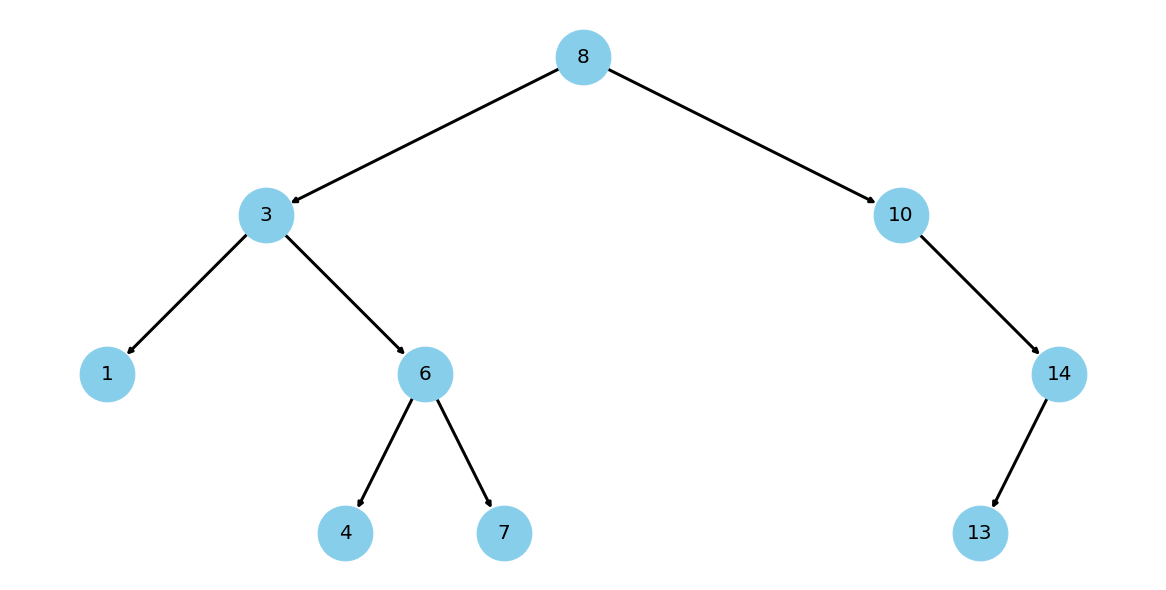

In [166]:
test_tree().plot_tree()

In [167]:
t2=test_tree2()
t2.print_tree()

Root: B
  L--- Ќ
    L--- C
    R--- Г
  R--- Д
    R--- Ж
      L--- Џ


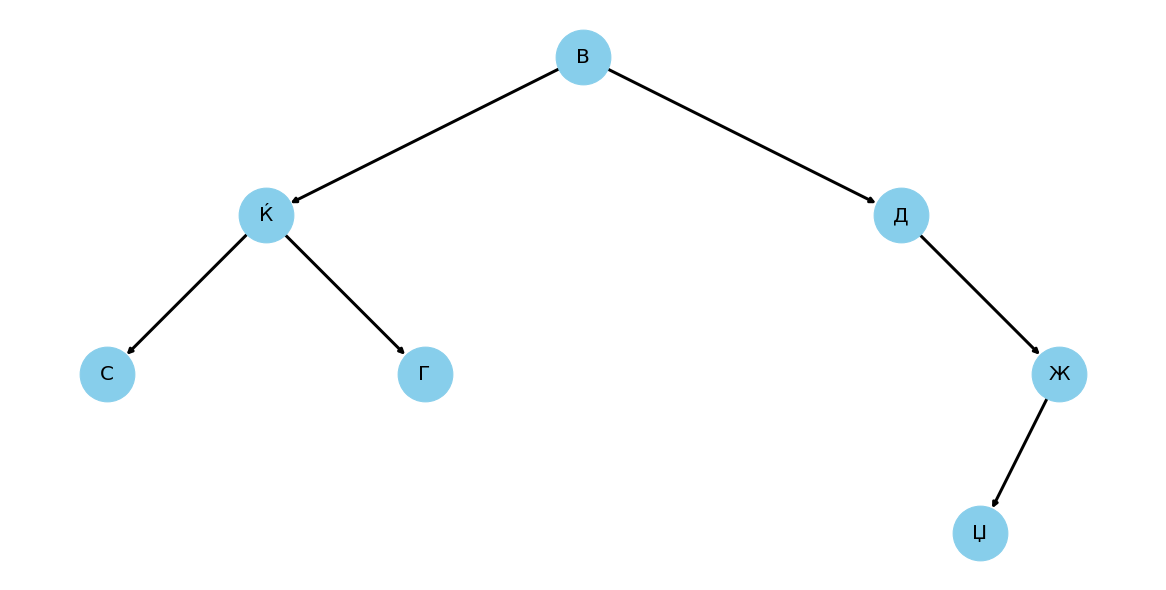

In [168]:
t2.plot_tree()